In [151]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Вложенные окружности

Напишем функцию, отрисовывающую три вложенных друг в друга окружности, каждая из которых и будет являться кластером. По итогу получаем три разных кластера точек, окрашенных в разные цвета, после чего подаём на вход алгритму K-Means те же самые точки, но неразмеченные и сравниваем результаты.

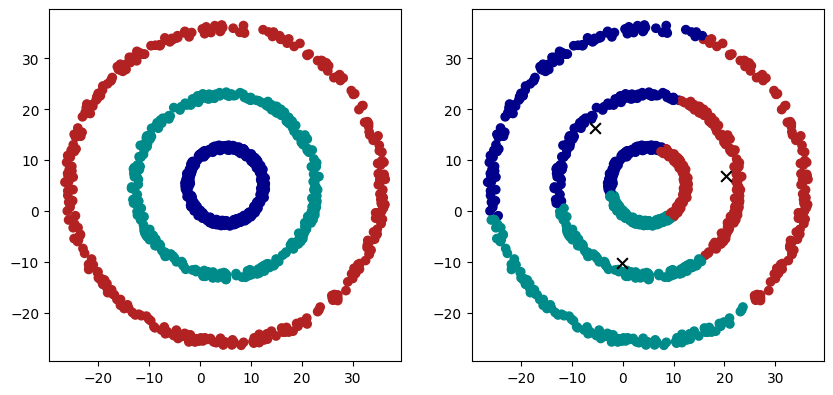

In [152]:
colors = ['firebrick', 'darkcyan', 'darkblue']
def generate_circles(n_points, center_x, center_y, radiuses, colors):
    points = []
    matched_colors = []
    for i in range(n_points):
        angle = 2 * math.pi * random.random()

        r = radiuses[i % len(radiuses)] * math.sqrt(random.uniform(radiuses[i % len(radiuses)] - 1,
                                                                   radiuses[i % len(radiuses)]))
        x = r * math.cos(angle) + center_x
        y = r * math.sin(angle) + center_y

        points.append((x, y))
        matched_colors.append(colors[i % len(radiuses)])

    return list((np.array(points), matched_colors))

data = generate_circles(1000, 5, 5, [10, 7, 4], colors)

kmeans = KMeans(n_clusters=3, n_init=10).fit(data[0])

matched_colors = [colors[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), subplot_kw=dict(box_aspect=1))

axs[0].scatter(data[0][:, 0], data[0][:, 1], marker='o', color=data[1])
axs[1].scatter(data[0][:, 0], data[0][:, 1], marker='o', color=matched_colors)
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='x', color='black', s=60)

Как можно заметить, алгоритм не справляется с определением кластеров. Чёрными крестиками показаны центроиды кластеров.

# Датасет ирисов
Воспользуемся далее датасетом цветов ирисов из scikit-learn для следующего примера.

In [176]:
iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Датасет содержит 4 признака, уберём последний признак, чтобы в последствии можно было отрисовать картинку.

In [178]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

На выходе все цветы распределяются на 3 класса, т.е. количество кластеров = 3. Как и в предыдущем примере, раскрасим точки в пространстве в три разных цвета в соответствии с таргетными значениями, содержащимися в датасете, а алгоритму K-Means подадим неразмеченную выборку.

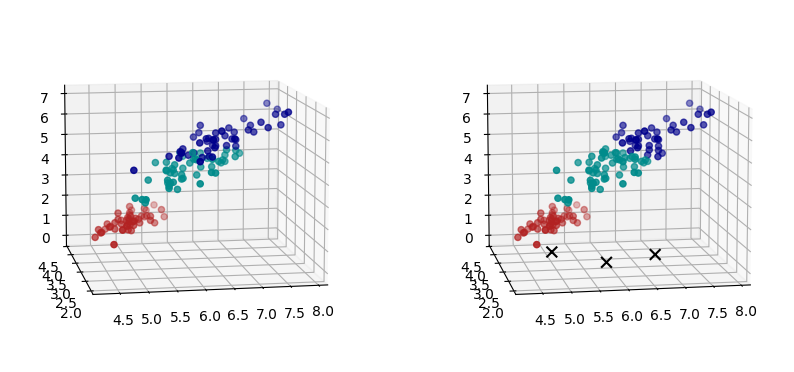

In [172]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d', sharex=ax1, sharey=ax1, sharez=ax1)

data = [[elem[0], elem[1], elem[2]] for elem in iris['data']]
matched_colors = [colors[elem] for elem in iris['target']]

ax1.scatter([elem[0] for elem in data], [elem[1] for elem in data],
           [elem[2] for elem in data], color=matched_colors)
ax1.view_init(10, -100)

kmeans = KMeans(n_clusters=3, n_init=10).fit(data)
matched_colors = [colors[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]

ax2.scatter([elem[0] for elem in data], [elem[1] for elem in data],
           [elem[2] for elem in data], color=matched_colors)

ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', color='black', s=60, alpha=1)
ax2.view_init(10, -100)

Алгоритм правильно классифицировал большинство точек, но некоторые точки, особенно между тёмно-синим и тёмно-голубым кластерами, были классифицированы неверно, что говорит о том, что алгоритм не способен выявлять какие-то нетривиальные зависимости. 

# Выбросы

Последним примером станет выборка, содержащая относительно большое количество выбросов.

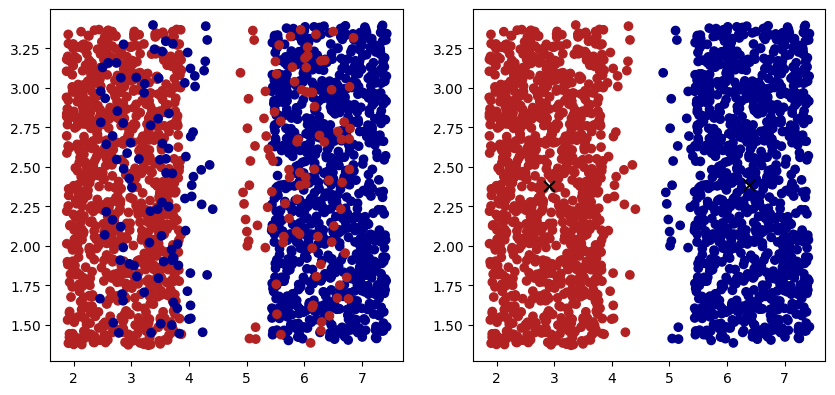

In [197]:
colors = ['firebrick', 'darkblue']

def generate_outliers(n_points, colors):
    points = []
    matched_colors = []

    x1 = random.uniform(1, 3)
    y1 = random.uniform(2, 2.5)

    x2 = random.uniform(6, 9)
    y2 = random.uniform(2, 2.5)

    N = int(n_points * 0.9)

    for i in range(N):

        points.append((random.uniform(x1 - 1, x1 + 1),
                      random.uniform(y1 - 1, y1 + 1)))
        matched_colors.append(colors[0])
        points.append((random.uniform(x2 - 1, x2 + 1),
                      random.uniform(y2 - 1, y2 + 1)))
        matched_colors.append(colors[1])
    
    for i in range(n_points - N):

        points.append((random.uniform(x1 + 2, x1 + 4),
                random.uniform(y1 - 1, y1 + 1)))
        matched_colors.append(colors[0])
        points.append((random.uniform(x2  - 4, x2 - 2),
                        random.uniform(y2 - 1, y2 + 1)))
        matched_colors.append(colors[1])


    return list((np.array(points), matched_colors))

data = generate_outliers(1000, colors)

kmeans = KMeans(n_clusters=2, n_init=10).fit(data[0])

matched_colors = [colors[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]

fig, axs = plt.subplots(ncols=2, figsize=(10, 10), subplot_kw=dict(box_aspect=1))

axs[0].scatter(data[0][:, 0], data[0][:, 1], marker='o', color=data[1])
axs[1].scatter(data[0][:, 0], data[0][:, 1], marker='o', color=matched_colors)
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='x', color='black', s=60)

    

    

Как и стоило ожидать, алгоритм K-Means слишком тривиальный для такой задачи и не способен правильно классифицировать выбросы.